In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr

# Caricamento dei dataset
data2_covariat = pd.read_csv("dataset2_covariates.csv")
data2_concentrations = pd.read_csv("dataset2_concentration.csv")



#checking Data input and outputs for information

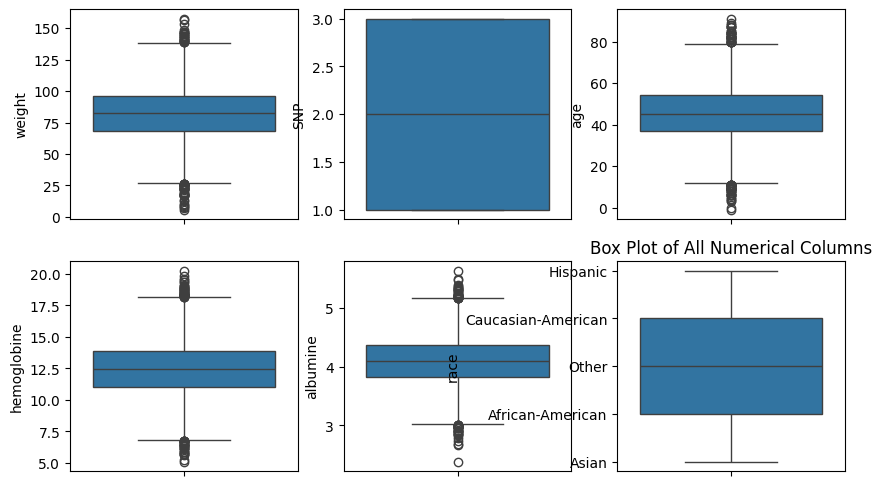

In [4]:
# Preprocessing: Standardizzazione e codifica delle variabili categorich
import matplotlib.pyplot as plt
import seaborn as sns
scaler = StandardScaler()
#X2 = pd.get_dummies(X2, columns=['sex', 'race', 'SNP'], drop_first=True)  # One-hot encoding per le variabili categoriche

# 2. Box Plot (to visualize distribution and outliers)
fig, ax = plt.subplots(2,3,figsize=(10, 6)) # Corrected: fig, ax = ... instead of ax, fig = ...
sns.boxplot(data=data2_covariat, y='weight', ax=ax[0,0])
sns.boxplot(data=data2_covariat, y='SNP', ax=ax[0,1])
sns.boxplot(data=data2_covariat, y='age', ax=ax[0,2])
sns.boxplot(data=data2_covariat, y='hemoglobine', ax=ax[1,0])
sns.boxplot(data=data2_covariat, y='albumine', ax=ax[1,1])
sns.boxplot(data=data2_covariat, y='race', ax=ax[1,2])
plt.title('Box Plot of All Numerical Columns')
plt.show()

Data seem to be synthetic, the desterbutions is too perfec

In [7]:
data2_covariat.isnull().sum()


age                    0
sex                    0
race                   0
weight                 0
SNP                    0
hemoglobine            0
albumine               0
last_dose_time         0
mg_twice_daily_dose    0
blood_conc             0
CL                     0
V                      0
ke                     0
dtype: int64

In [8]:

#data2_covariates =   # Standardizzazione delle covariate
import plotly.express as px
#fig, ax = plt.subplots(1,1,figsize=(10, 6)) # Corrected: fig, ax = ... instead of ax, fig = ...
def draw_corlation(d_set):
  correlation = d_set.corr(numeric_only=True)
  fig = px.imshow(
    correlation,
    template = "plotly_dark",
    text_auto = "0.2f",
    aspect=1,
    color_continuous_scale="orrd",
    title= "Correlations Between Data"
  )

  fig.update_layout(
    title = {
        "font" :{
            "size" : 28,
            "family" : "tahoma"
        }
    }
  )
#iplot(fig)
  fig.show()

draw_corlation(data2_covariat)

There is very small relation between differnt parts beside the last two
---
lets chek standrize values as well

In [9]:
d2 = data2_covariat.copy()
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for column in d2.columns:
    if pd.api.types.is_numeric_dtype(d2[column]):
      d2[column] = scaler.fit_transform(d2[[column]])
      a=1
    else:
      d2[column] = encoder.fit_transform(d2[column])
draw_corlation(d2)

NO changes || the values beside the last two colums are indipentent
----
lets check how the output values are related

In [10]:
draw_corlation(data2_concentrations)

It seems like each time can easly be predicted by the previous four values
----
meaning if we get the first four, we can calute the rest from them

------
Let's check standize vales as well

In [11]:
d3_df = scaler.fit_transform(data2_concentrations)
d3 = pd.DataFrame(d3_df, columns=data2_concentrations.columns)

draw_corlation(d3)


In [12]:
d3.describe()


,ID,t0,t1,t2,t3,t4,t5,t6,t7,t8,...,t39,t40,t41,t42,t43,t44,t45,t46,t47,t48
count,1.000000e+04,10000.0,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,...,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,-9.094947e-17,0.0,1.470823e-16,-9.379164e-17,7.460699e-17,8.881784e-17,-2.984279e-17,2.476241e-16,-4.618528e-18,-1.183054e-16,...,1.151079e-16,9.094947e-17,-9.947598e-18,-6.252776e-17,6.536993e-17,1.847411e-17,-4.547474e-17,-5.400125e-17,1.094236e-16,-6.963319e-17
std,1.000050e+00,0.0,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,...,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-1.731878e+00,0.0,-1.369401e+00,-1.488834e+00,-1.595773e+00,-1.672548e+00,-1.744176e+00,-1.877525e+00,-1.902894e+00,-1.884928e+00,...,-9.086419e-01,-8.957175e-01,-8.833017e-01,-8.713629e-01,-8.598719e-01,-8.488017e-01,-8.381275e-01,-8.278266e-01,-8.178778e-01,-8.082616e-01
25%,-8.659388e-01,0.0,-6.807493e-01,-7.045869e-01,-7.076134e-01,-6.978119e-01,-6.724082e-01,-6.428312e-01,-6.181765e-01,-6.155555e-01,...,-7.251497e-01,-7.257750e-01,-7.259785e-01,-7.260480e-01,-7.249166e-01,-7.239387e-01,-7.227283e-01,-7.207465e-01,-7.190535e-01,-7.169877e-01
50%,0.000000e+00,0.0,-2.486928e-01,-2.304412e-01,-2.107615e-01,-1.919289e-01,-1.796232e-01,-2.034276e-01,-2.390219e-01,-2.581310e-01,...,-3.469624e-01,-3.509101e-01,-3.568908e-01,-3.613798e-01,-3.641397e-01,-3.697536e-01,-3.739721e-01,-3.773625e-01,-3.827203e-01,-3.882232e-01
75%,8.659388e-01,0.0,3.824981e-01,4.380528e-01,4.674162e-01,4.518005e-01,4.099403e-01,3.830461e-01,3.671775e-01,3.558903e-01,...,3.804931e-01,3.785604e-01,3.718221e-01,3.692829e-01,3.659288e-01,3.592772e-01,3.578073e-01,3.465398e-01,3.446918e-01,3.416301e-01
max,1.731878e+00,0.0,1.146065e+01,8.811000e+00,8.164744e+00,8.267504e+00,8.557881e+00,9.067872e+00,9.415044e+00,9.623138e+00,...,5.657969e+00,5.606263e+00,5.553971e+00,5.501136e+00,5.447800e+00,5.406917e+00,5.394871e+00,5.383150e+00,5.377813e+00,5.371498e+00


same thing
-----
t0 is uslesss|| alwyays 0
------
lets find usful colums in input
---
 by seeing corrlation with one of the outputs

In [13]:
data2_covariat['last_dose_time'].value_counts()

last_dose_time
52    10000
Name: count, dtype: int64

In [14]:
d2_ = d2.copy()
d2_['t1'] = data2_concentrations['t1']
d2_.drop('last_dose_time',axis = 1,inplace=True)



draw_corlation(d2_)


Last two colums are highly related
----
lets remove them to see what the relaship between the rest is like

In [15]:

d3 = d2_.drop('ke',axis = 1)
d3.drop('V',axis = 1,inplace=True)
d3.drop('CL',axis = 1,inplace=True)
#d3['t2'] = data2_concentrations['t2']
draw_corlation(d3)

Still the same, some colums have 0 corrlations
-----
lets remove the zeros

In [16]:
d2_.columns

Index(['age', 'sex', 'race', 'weight', 'SNP', 'hemoglobine', 'albumine',
       'mg_twice_daily_dose', 'blood_conc', 'CL', 'V', 'ke', 't1'],
      dtype='object')

In [17]:
d3 = d2_.copy()
d3.drop('weight',axis = 1,inplace=True)
d3.drop('SNP',axis = 1,inplace=True)
d3.drop('albumine',axis = 1,inplace=True)
d3.drop('blood_conc',axis = 1,inplace=True)
d3.drop('ke',axis = 1,inplace=True)
d3.drop('V',axis = 1,inplace=True)
d3.drop('CL',axis = 1,inplace=True)
draw_corlation(d3)

they are almost not related
----
lets check t2 , t3 as well if there is a relation

In [18]:
d4=d3.copy()
d4.drop('t1',axis = 1,inplace=True)
d4['t2'] = data2_concentrations['t2']
draw_corlation(d4)

In [19]:
d4=d3.copy()
d4.drop('t1',axis = 1,inplace=True)
d4['t3'] = data2_concentrations['t3']
draw_corlation(d4)

#modeling

```
Lets see if we can model properly with just last three coulms
```



In [20]:
X2 = d2[['CL', 'V', 'ke']]
y2 = data2_concentrations[['t1']]  # Concentrazioni da t0 a t48 (t0, t1, ..., t48)
# Divisione tra dati di addestramento e dati di test (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Creazione e addestramento del modello Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
history = model.fit(X_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



MSE (Mean Squared Error): 1.667523800698103e-06
R² Score: 0.999116274270362


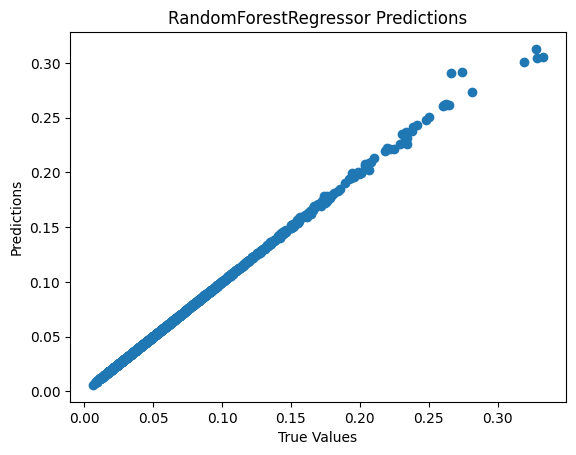

In [21]:
# Predizione sui dati di test
y_pred = model.predict(X_test)

# Calcolo delle metriche di performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
#
import matplotlib as mpl
print(f"MSE (Mean Squared Error): {mse}")
print(f"R² Score: {r2}")
#mpl.style.use('classic')
plt.scatter(y_test, y_pred)
plt.title('model accuracy')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("RandomForestRegressor Predictions")
plt.show()
#

In [22]:
X3 = d2.copy()
y3 = data2_concentrations[['t1']]  # Concentrazioni da t0 a t48 (t0, t1, ..., t48)
# Divisione tra dati di addestramento e dati di test (80% training, 20% testing)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Creazione e addestramento del modello Random Forest Regressor
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
history = model2.fit(X_train2, y_train2)

# Predizione sui dati di test


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



MSE (Mean Squared Error): 2.5387152591549803e-06
R² Score: 0.9986545751288224


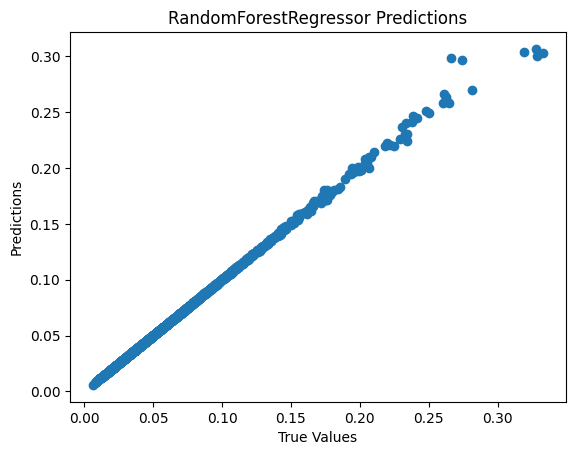

In [23]:
y_pred2 = model2.predict(X_test2)

# Calcolo delle metriche di performance
mse2 = mean_squared_error(y_test2, y_pred2)
r3 = r2_score(y_test2, y_pred2)
###
import matplotlib as mpl
print(f"MSE (Mean Squared Error): {mse2}")
print(f"R² Score: {r3}")
#mpl.style.use('classic')
plt.scatter(y_test2, y_pred2)
plt.title('model accuracy')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("RandomForestRegressor Predictions")
plt.show()
#

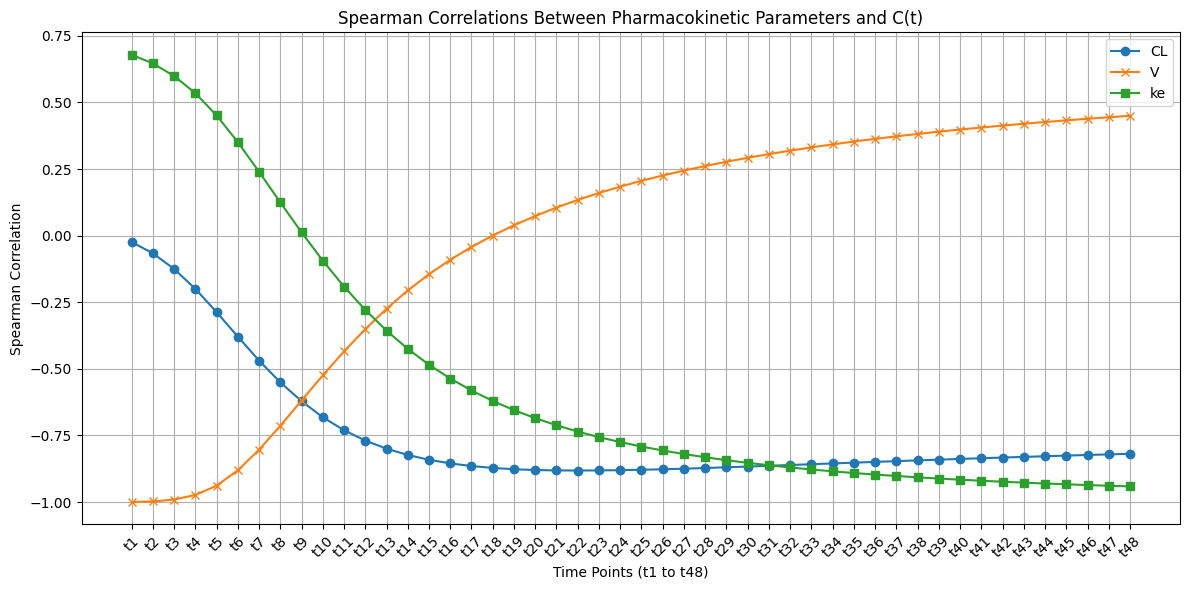

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Ensure the columns for time points are available
time_points = [f't{t}' for t in range(1, 49) if f't{t}' in data2_concentrations.columns]

# Initialize dictionary to store correlations
correlations = {}

# Calculate Spearman correlation for each time point
for t in time_points:
    correlations[t] = {
        "CL": spearmanr(data2_covariat["CL"], data2_concentrations[t])[0],
        "V": spearmanr(data2_covariat["V"], data2_concentrations[t])[0],
        "ke": spearmanr(data2_covariat["ke"], data2_concentrations[t])[0],
    }

# Convert correlations to a DataFrame for visualization
correlation_df = pd.DataFrame(correlations).T

# Plot the correlations
plt.figure(figsize=(12, 6))
plt.plot(correlation_df.index, correlation_df["CL"], label="CL", marker='o')
plt.plot(correlation_df.index, correlation_df["V"], label="V", marker='x')
plt.plot(correlation_df.index, correlation_df["ke"], label="ke", marker='s')
plt.title("Spearman Correlations Between Pharmacokinetic Parameters and C(t)")
plt.xlabel("Time Points (t1 to t48)")
plt.ylabel("Spearman Correlation")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# The range of Spearman correlation values, from \(-1\) to \(0.75\), reflects the strength 
# and direction of the relationship between pharmacokinetic parameters (\(CL\), \(V\), \(ke\)) 
# and drug concentrations (\(C(t)\)) at various time points.



# ### **Spearman Correlation Range**
# Spearman correlation measures the monotonicity between two variables:
# - \(+1\): Perfectly positive monotonic relationship (as one variable increases, the other consistently increases).
# - \(0\): No monotonic relationship between the variables.
# - \(-1\): Perfectly negative monotonic relationship (as one variable increases, the other consistently decreases).



# ### **Interpretation of Negative Values**
# Negative values indicate an **inverse relationship** between the pharmacokinetic parameter and the concentration \(C(t)\). In other words:
# - When the parameter value (e.g., \(CL\)) increases, the concentration \(C(t)\) tends to **decrease**.
# - This could reflect pharmacokinetic aspects:
#   - **CL (Clearance):** High clearance indicates that the drug is eliminated faster from the body, so \(C(t)\) is expected to decrease.
#   - **V (Volume of distribution):** A higher distribution volume dilutes the drug in the body, reducing \(C(t)\).
#   - **ke (Elimination constant):** A higher \(ke\) is associated with faster elimination, reducing concentrations over time.



# ### **Why Do Positive Values Not Reach +1?**
# - Positive correlation values reaching up to \(0.75\) but not \(+1\) suggest a **partially monotonic relationship** between the variables. This may occur because:
#   - The relationship between the pharmacokinetic parameter and \(C(t)\) is not perfectly linear or monotonic.
#   - Other factors (e.g., covariates like age or weight) may influence \(C(t)\), reducing the correlation strength.



# ### **Biological Implications**
# The negative values and their range reflect physiological mechanisms:
# - **Clearance and concentration inversely proportional:** With high clearance (\(CL\)), the drug is eliminated more quickly, leading to lower concentrations (\(C(t)\)).
# - **Volume of distribution:** A larger volume of distribution (\(V\)) disperses the drug across a greater volume, reducing the observed concentration.



Test MSE: 0.000
Test R²: 0.999


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomFo

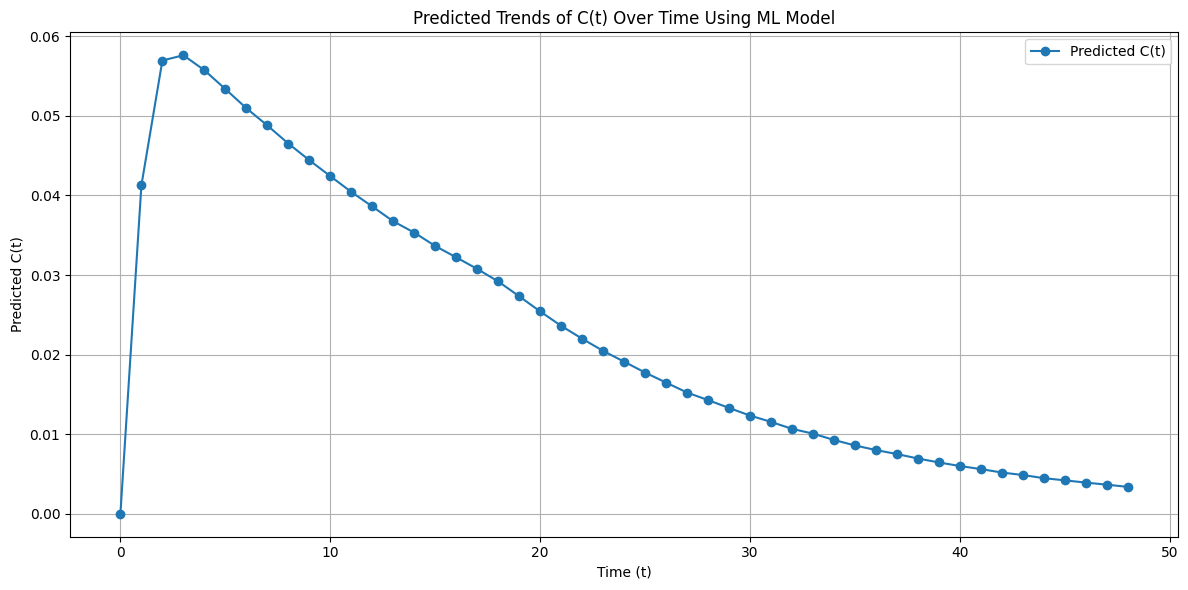

In [28]:

# Convert data into long format
data_long = data2_concentrations.copy()
data_long['subject'] = data_long.index  # Add subject identifier
data_melted = data_long.melt(id_vars='subject', var_name='time', value_name='C(t)')

# Extract the time point as an integer, dropping invalid or NaN rows
data_melted = data_melted[data_melted['time'].str.startswith('t', na=False)]  # Keep only time columns
data_melted['time'] = data_melted['time'].str.extract(r'(\d+)').astype(float).dropna().astype(int)

# Add CL, V, ke for each subject
data_melted = data_melted.merge(data2_covariat[['CL', 'V', 'ke']], left_on='subject', right_index=True)

# Prepare features and target
X = data_melted[['time', 'CL', 'V', 'ke']]
y = data_melted['C(t)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model performance
from sklearn.metrics import mean_squared_error, r2_score

y_test_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print(f"Test MSE: {mse:.3f}")
print(f"Test R²: {r2:.3f}")

# Predict C(t) trends for average parameter values
time_points = sorted(data_melted['time'].unique())
predictions = []

avg_CL = data2_covariat['CL'].mean()
avg_V = data2_covariat['V'].mean()
avg_ke = data2_covariat['ke'].mean()

for t in time_points:
    pred = model.predict([[t, avg_CL, avg_V, avg_ke]])
    predictions.append(pred)

# Plot the predicted trends
plt.figure(figsize=(12, 6))
plt.plot(time_points, predictions, label='Predicted C(t)', marker='o')
plt.xlabel("Time (t)")
plt.ylabel("Predicted C(t)")
plt.title("Predicted Trends of C(t) Over Time Using ML Model")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


Extended Model Test MSE: 0.000
Extended Model Test R²: 0.999


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomFo

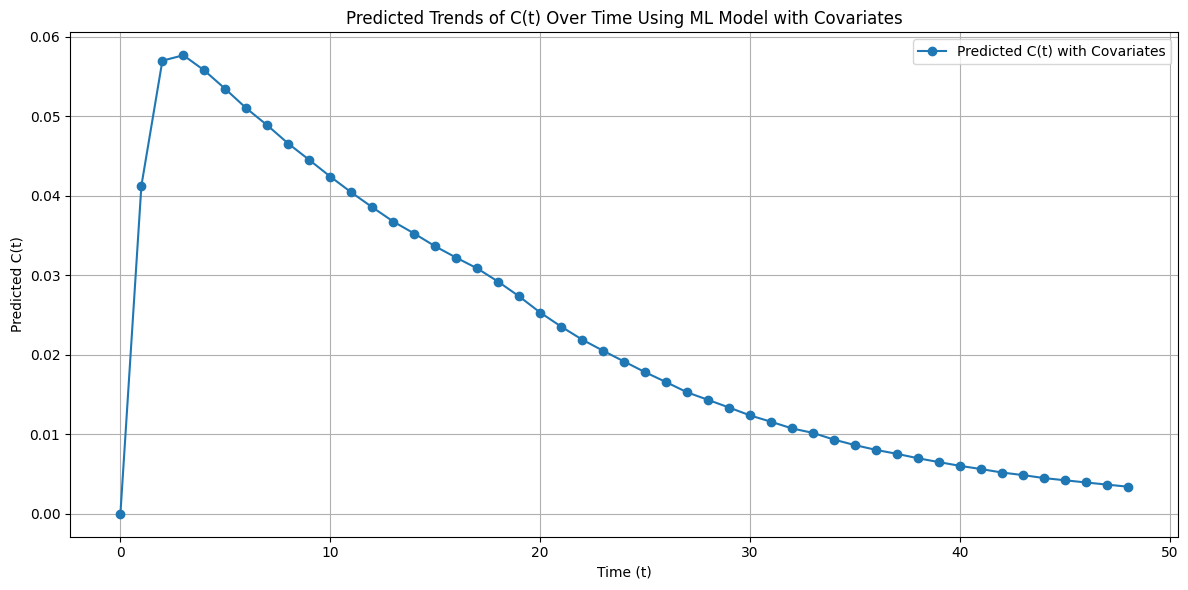

ValueError: cannot reindex on an axis with duplicate labels

In [29]:


# Convert data into long format
data_long = data2_concentrations.copy()
data_long['subject'] = data_long.index  # Add subject identifier
data_melted = data_long.melt(id_vars='subject', var_name='time', value_name='C(t)')

# Extract the time point as an integer
data_melted = data_melted[data_melted['time'].str.startswith('t', na=False)]  # Keep only time columns
data_melted['time'] = data_melted['time'].str.extract(r'(\d+)').astype(float).dropna().astype(int)

# Add CL, V, ke for each subject
data_melted = data_melted.merge(data2_covariat[['CL', 'V', 'ke']], left_on='subject', right_index=True)

# Add additional covariates (age, weight, hemoglobine, albumine)
data_melted_extended = data_melted.merge(
    data2_covariat[['age', 'weight', 'hemoglobine', 'albumine']],
    left_on='subject', right_index=True
)

# Prepare features (including covariates) and target
X_extended = data_melted_extended[['time', 'CL', 'V', 'ke', 'age', 'weight', 'hemoglobine', 'albumine']]
y_extended = data_melted_extended['C(t)']

# Split the data
X_train_ext, X_test_ext, y_train_ext, y_test_ext = train_test_split(X_extended, y_extended, test_size=0.2, random_state=42)

# Train Random Forest Regressor with extended features
model_ext = RandomForestRegressor(n_estimators=100, random_state=42)
model_ext.fit(X_train_ext, y_train_ext)

# Evaluate the model with covariates included
y_test_pred_ext = model_ext.predict(X_test_ext)
mse_ext = mean_squared_error(y_test_ext, y_test_pred_ext)
r2_ext = r2_score(y_test_ext, y_test_pred_ext)

print(f"Extended Model Test MSE: {mse_ext:.3f}")
print(f"Extended Model Test R²: {r2_ext:.3f}")

# Predict C(t) trends with covariates at their mean values
time_points = sorted(data_melted_extended['time'].unique())
predictions_ext = []

# Average values for the covariates
avg_CL = data2_covariat['CL'].mean()
avg_V = data2_covariat['V'].mean()
avg_ke = data2_covariat['ke'].mean()
avg_age = data2_covariat['age'].mean()
avg_weight = data2_covariat['weight'].mean()
avg_hemoglobine = data2_covariat['hemoglobine'].mean()
avg_albumine = data2_covariat['albumine'].mean()

for t in time_points:
    pred = model_ext.predict([[t, avg_CL, avg_V, avg_ke, avg_age, avg_weight, avg_hemoglobine, avg_albumine]])
    predictions_ext.append(pred)

# Plot the predicted trends with covariates included
plt.figure(figsize=(12, 6))
plt.plot(time_points, predictions_ext, label='Predicted C(t) with Covariates', marker='o')
plt.xlabel("Time (t)")
plt.ylabel("Predicted C(t)")
plt.title("Predicted Trends of C(t) Over Time Using ML Model with Covariates")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# Stratify by age groups and plot trends
age_groups = pd.qcut(data2_covariat['age'], q=3, labels=['Young', 'Middle', 'Old'])
data_melted_extended['age_group'] = age_groups.loc[data_melted_extended['subject']]

predictions_by_age = {'Young': [], 'Middle': [], 'Old': []}
for group in predictions_by_age.keys():
    avg_covariates = data2_covariat[data2_covariat['age'].between(*age_groups[group].limits)].mean()
    for t in time_points:
        pred = model_ext.predict(
            [[t, avg_CL, avg_V, avg_ke, avg_covariates['age'], avg_covariates['weight'],
              avg_covariates['hemoglobine'], avg_covariates['albumine']]]
        )
        predictions_by_age[group].append(pred)

# Plot trends for each age group
plt.figure(figsize=(12, 6))
for group, preds in predictions_by_age.items():
    plt.plot(time_points, preds, label=f'{group} Age Group')
plt.xlabel("Time (t)")
plt.ylabel("Predicted C(t)")
plt.title("Predicted Trends of C(t) Over Time Stratified by Age Group")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
